# 1. Data loadings

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
import numpy as np
import sys

%matplotlib inline

In [4]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [3]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


# 2. Data exploration

In [6]:
train.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [7]:
train.duplicated().sum()

0

In [8]:
train.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

# 3. Data cleaning

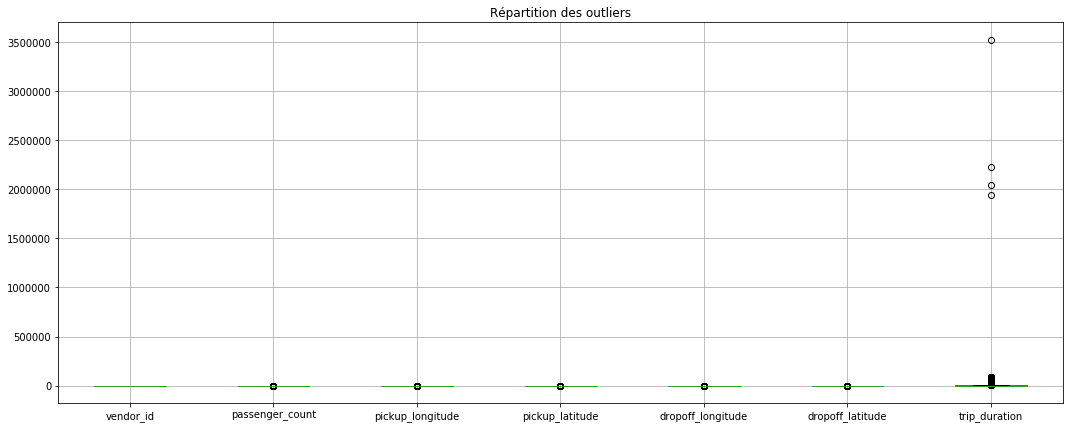

In [9]:
plt.subplots(figsize=(18,7))
plt.title("Répartition des outliers")
train.boxplot()

In [10]:
train = train.loc[train['trip_duration']< 1500000]

# 4. Features selection, features extractions

In [11]:
y_train = train["trip_duration"] # <-- target
X_train = train[["passenger_count", "pickup_longitude", "pickup_latitude", "dropoff_longitude","dropoff_latitude"]] # <-- features

In [14]:
m1 = RandomForestRegressor()

In [12]:

m1.fit(X_train, y_train)

c:\users\clemence\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [14]:
m1_scores = cross_val_score(m1, X_train, y_train, cv=5, scoring ="neg_mean_squared_log_error")


In [15]:
for i in range(len(m1_scores)):
    m1_scores[i] = np.sqrt(abs(m1_scores[i]))
m1_scores

array([0.58421718, 0.58137747, 0.5804734 , 0.582001  , 0.57778654])

In [16]:
np.mean(m1_scores)

0.5811711180889609

In [18]:
sgd = SGDRegressor()
sgd.fit(X_train, y_train)

c:\users\clemence\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [26]:
loss = MSE(y_train, sgd.predict(X_train))
loss
np.sqrt(np.log(loss))

7.447524353865493

In [ ]:
#SGD IS VERY BAD

In [29]:
lr = LinearRegression()
lr.fit(X_train, y_train)
loss = MSE(y_train, lr.predict(X_train))
np.sqrt(np.log(loss))

4.0149166317323095

In [ ]:
#LINEAR IS ALSO BAD

In [22]:
train = train[(train['trip_duration'] > 60) & (train['trip_duration'] < 3600 * 24)]

train['hour'] = train['pickup_datetime'].apply(lambda x: int(x.split()[1][0:2]))

train['dist'] = np.sqrt((train['pickup_latitude']-train['dropoff_latitude'])**2 
                         + (train['pickup_longitude']-train['dropoff_longitude'])**2)


In [26]:
y_train = train["trip_duration"] # <-- target
X_train = train[["passenger_count", "pickup_longitude", "pickup_latitude", "dropoff_longitude","dropoff_latitude","dist","hour"]] # <-- features

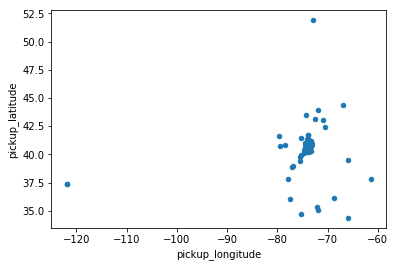

In [44]:
X_train.plot.scatter(x='pickup_longitude',y='pickup_latitude')

In [27]:

m1.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [28]:
m1_scores = cross_val_score(m1, X_train, y_train, cv=5, scoring ="neg_mean_squared_log_error")
for i in range(len(m1_scores)):
    m1_scores[i] = np.sqrt(abs(m1_scores[i]))
m1_scores
np.mean(m1_scores)

0.5236638553868198

# 5. Validation 

# 6. Model-election

# 7.Model training

# 8. Make prediction

# 9.Submit